Valentin Fievez

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### LECTURE, EXTRACTION ET VISUALISATION DES DONNEES

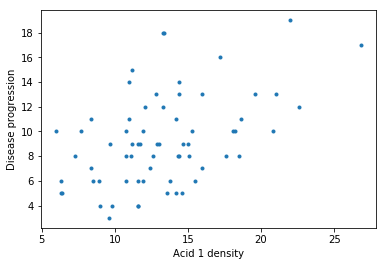

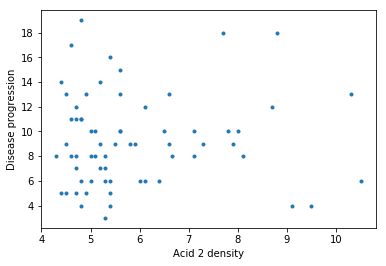

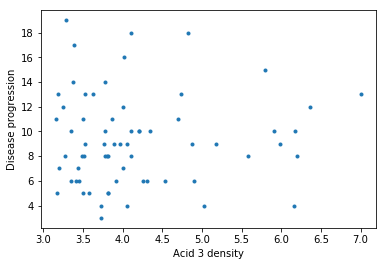

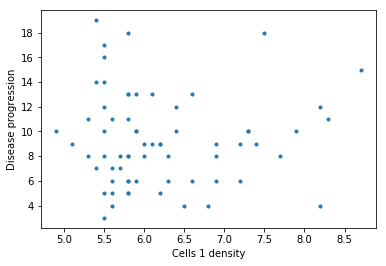

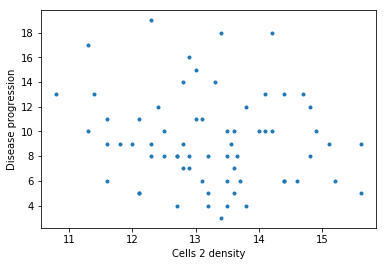

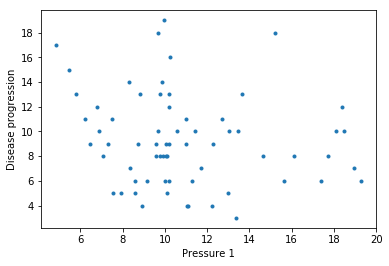

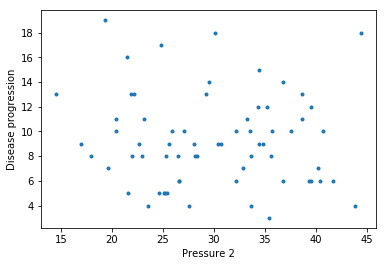

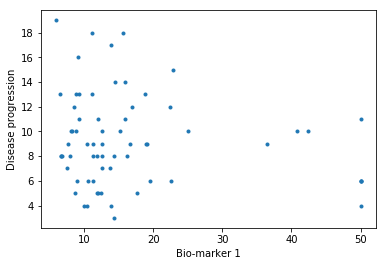

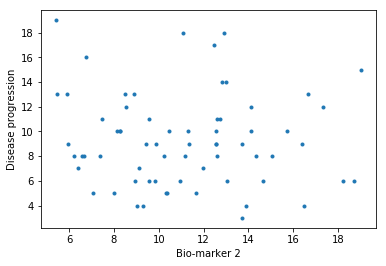

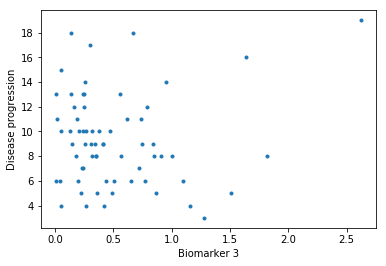

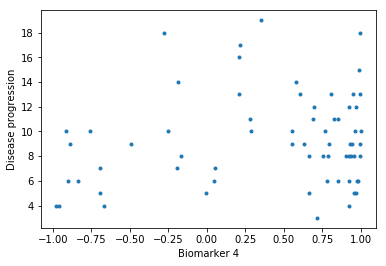

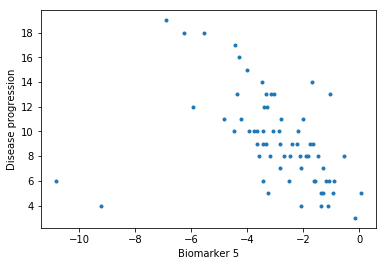

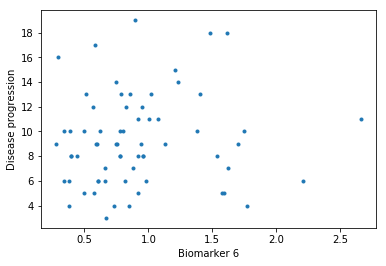

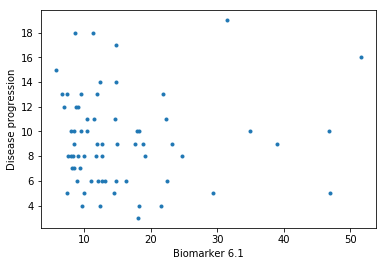

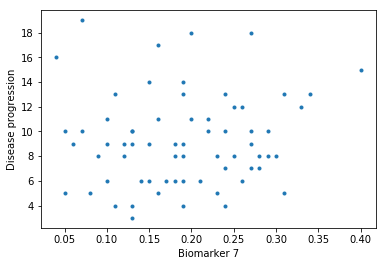

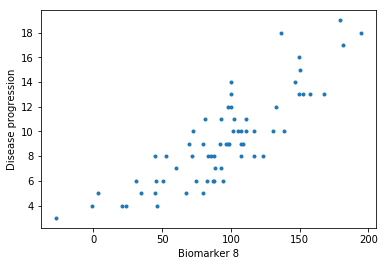

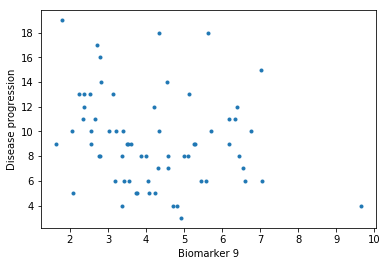

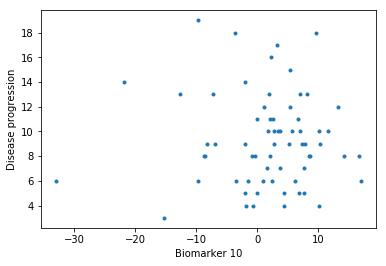

In [3]:
dataframe=pandas.read_csv("./MedicalData1.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Disease progression')
  plt.show()

##### QUESTION 1 : Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Disease progression'. Si oui, lesquels ?

Il semble que la variable 'Disease progression' soit corrélée positivement avec la variable 'Acid 1 density' ainsi qu'avec la variable 'Biomarker 8'. Sur les graphiques, cela se traduit par le fait que globalement, si la variable 'Acid 1 density' ou 'Biomarker 8' augmente alors la variable 'Disease progression' augmente. On observe également une corrélation négative entre la variable 'Disease progression' et la variable 'Biomarker 5'. C'est à dire que globalement quand les valeurs de la variable 'Biomarker 5' augmentent, les valeurs de la variable 'Disease progression' diminuent.

##### QUESTION 2: On se demande si il est possible de predire le niveau de 'Disease progression' à partir de la variable 'Acid 1 density'. 

##### QUESTION 2.1: Effectuez une regression lineaire simple entre ces deux variables et predisez ensuite les valeurs de 'Disease progression' a l'aide de 'Acid 1 density'. Vous pourrez evaluer la qualité des predictions a l'aide du coefficient de determination R2.

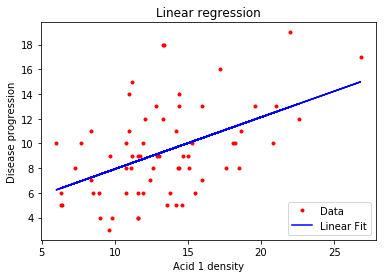

Le modele lineaire est: Y = 3.7186254486308323 + 0.4203450401856767 * X_Acid1density
Le coefficient r2 du modele est: 0.22756273597159715


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ColNb_X=listColNames.index('Acid 1 density')
X_Acid1density=XY[:,ColNb_X].reshape((XY.shape[0],1))

lr = LinearRegression()
lr.fit(X_Acid1density, Y)  

fig = plt.figure()
plt.plot(X_Acid1density, Y, 'r.') # observations
plt.plot(X_Acid1density, lr.predict(X_Acid1density), 'b-') #prediction par le modele lineaire
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.xlabel('Acid 1 density')
plt.ylabel('Disease progression')
plt.title('Linear regression')
plt.show()

print("Le modele lineaire est: Y = " + str(lr.intercept_[0]) + ' + ' + str(lr.coef_[0,0]) + ' * X_Acid1density')

r2score = r2_score(Y, lr.predict(X_Acid1density))
print('Le coefficient r2 du modele est: ' + str(r2score))

Pour évaluer la qualité de la prédiction de la régression linéaire, ici représentée en bleu sur le graphe, on calcule le coefficent r2 égal à 0.23. Avec un modèle linéaire, la variable 'Acid 1 density' explique 23% de la variabilité de la variable 'Disease progression'.

##### QUESTION 2.2: Evaluez la stabilite des predictions a l'aide d'une methode de validation croisee de type 4-folds.


In [5]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle = True)
split_number = 1
for train, test in kf.split(X_Acid1density):
    X_train=X_Acid1density[train]
    Y_train=Y[train]
    X_test=X_Acid1density[test]
    Y_test=Y[test]
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    sum_squared_error=np.sum((Y_test-lr.predict(X_test))**2)
    print('\nSplit n°' + str(split_number))
    print('Le coeffient r2 du modèle est: ' + str(r2_score(Y, lr.predict(X_Acid1density))))
    print('La somme des résidus au carré du test set est: ' + str(sum_squared_error))
    print('Le coefficient de la régression linéaire est: ' + str(lr.coef_[0][0]))
    split_number += 1


Split n°1
Le coeffient r2 du modèle est: 0.21496399310733993
La somme des résidus au carré du test set est: 216.88759701921876
Le coefficient de la régression linéaire est: 0.36566595328281915

Split n°2
Le coeffient r2 du modèle est: 0.2141015293174101
La somme des résidus au carré du test set est: 264.9423390433228
Le coefficient de la régression linéaire est: 0.4772216605454192

Split n°3
Le coeffient r2 du modèle est: 0.22234854931601844
La somme des résidus au carré du test set est: 65.54054338774577
Le coefficient de la régression linéaire est: 0.4268295367007812

Split n°4
Le coeffient r2 du modèle est: 0.223268391451111
La somme des résidus au carré du test set est: 200.45369833319637
Le coefficient de la régression linéaire est: 0.4081488515460628


On remarque que pour chaque split du set de données, le coefficient r2 du modèle entier est sensiblement le même, la somme des erreurs au carré sur le test set et le coefficent Beta 1 du modèle linéaire ne varient pas trop d'un modèle à un autre. En effectuant une validation croisée de type 4-folds, on peut affirmer que les prédictions obtenues a l'aide d'une régression linéaire sont raisonnablement stables.

##### QUESTION 2.3: Auriez-vous eu de meilleurs resultats en predisant 'Disease progression' a l'aide de la variable 'Biomarker 8' ou 'Pressure 1'?

Au vu des graphiques obtenus à la question 1, la variable 'Biomarker 8' donnerait sûrement de meilleurs résultats, ce qui n'est pas le cas pour la variable 'Pressure 1'. En effet, qualitativement, les données sont plus recentrées autour d'une droite pour la variable 'Biomarker 8'. Vient ensuite la variable 'Acid 1 density' puis la variable 'Pressure 1'.

##### QUESTION 2.4 : Peut-on enfin dire si on observe une relation significative entre 'Disease progression' et (independament) 'Acid 1 density' ou 'Biomarker 8' ou 'Pressure 1'. On peut le valider en testant si les coefficients des pentes obtenues entre 'Disease progression' et chacune de ses trois variables par regression lineaire simples sont significativement differentes de 0.

In [6]:
from scipy import stats
from math import sqrt
for var in ['Acid 1 density', 'Biomarker 8', 'Pressure 1']:
    ColNb_X = listColNames.index(var)
    X_var = XY[:,ColNb_X].reshape((XY.shape[0],1))
    X_var_scaled = preprocessing.scale(X_var)
    
    lr = LinearRegression()
    lr.fit(X_var_scaled, Y)  
    
    r2 = r2_score(Y, lr.predict(X_var_scaled))
    print('\nPour la variable: ' + str(var))
    print('Le coefficient de la régression linéaire est: ' + str(lr.coef_[0][0]))
    print('Le coeffient r2 du modèle est: ' + str(r2))
    
    # t test
    n = X_var_scaled.shape[0]
    t0 = sqrt(r2*(n-2)) / sqrt(1 - r2)
    
    p_value = 2 * (1 - (stats.t.cdf(t0, n-2)))
    print('La p_value pour un test de Student sur le coefficient de la regression lineaire est: ' + str(p_value))


Pour la variable: Acid 1 density
Le coefficient de la régression linéaire est: 1.7571901033004678
Le coeffient r2 du modèle est: 0.22756273597159715
La p_value pour un test de Student sur le coefficient de la regression lineaire est: 5.130502783745605e-05

Pour la variable: Biomarker 8
Le coefficient de la régression linéaire est: 3.12014330511141
Le coeffient r2 du modèle est: 0.717484844408153
La p_value pour un test de Student sur le coefficient de la regression lineaire est: 0.0

Pour la variable: Pressure 1
Le coefficient de la régression linéaire est: -0.6427868583188499
Le coeffient r2 du modèle est: 0.030450724328070833
La p_value pour un test de Student sur le coefficient de la regression lineaire est: 0.16111033249605589


Les résultats obtenus confirment les observations graphiques. La variable Biomarker 8 explique le mieux la variabilité de la variable 'Disease progression' puis la variable 'Acid 1 density' puis la variable 'Pressure 1'. Ce qui est caractérisé par un coefficient de corrélation r2 plus grand. La p-value calculée à partir d'un test de Student vient amplifier les résultats. La variable Biomarker 8 est très significatif. La variable Acid 1 density est significatif et la variable Pressure 1 n'est pas significatif. On a donc montré ce qu'on avait affirmé a la question 2.3.

##### QUESTION 3 :   On s'interesse maintenant au lien entre la variable 'Disease progression' et 'Biomarker 5'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

##### QUESTION 3.1 : Quelles sont les valeurs aberrantes et quel va etre leur impact lors de l'estimation d'une relation lineaire entre ces deux variables ?

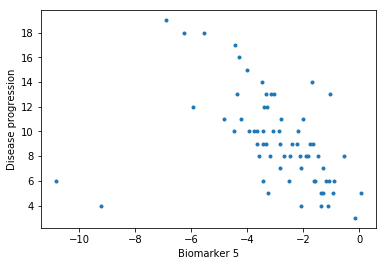

In [7]:
ColNb_X = listColNames.index('Biomarker 5')
Xbiomarker5 = XY[:,ColNb_X].reshape((XY.shape[0],1))

plt.plot(Xbiomarker5,Y[:],'.')
plt.xlabel('Biomarker 5')
plt.ylabel('Disease progression')
plt.show()

On observe deux valeurs aberrantes sur le graphique précédent. Elles sont situées en bas à gauche et sont très différentes du nuage de points formé par les autres données.

##### QUESTION 3.2 : Definissez une procedure de detection automatique de ces variables basee sur la distance de Cook.

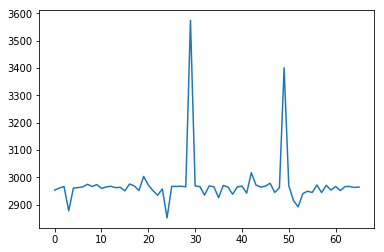

In [8]:
n = Xbiomarker5.shape[0]
distance_cook = np.zeros(n)

lr.fit(Xbiomarker5,Y)
s2=np.sum((Y-lr.predict(Xbiomarker5))**2)/(n-2)

for i in range(n):
  X_del_i=np.delete(Xbiomarker5,i)
  Y_del_i=np.delete(Y,i) 
  
  lr.fit(X_del_i[:, np.newaxis], Y_del_i)
  distance_cook[i]=np.sum((Y-lr.predict(Xbiomarker5))**2/(2*s2))

plt.plot(distance_cook)

On remarque que quasiment toutes les erreurs sont aux alentours de 3 000. On décide de trouver les indices pour lesquels cette erreur est supérieure à 3 200.

In [9]:
indices = np.where(distance_cook>3200)[0]

for ind in indices:
    print('Donnée aberrante n° '+ str(ind+1) + ': (' +str(Xbiomarker5[ind][0]) + '; ' + str(Y[ind][0]) + ')')

Donnée aberrante n° 30: (-10.82853664; 6.0)
Donnée aberrante n° 50: (-9.21027242; 4.0)


La 30 ième donnée et la 50 ième donnée sont aberrantes. On trouve respectivement (-10,82853664; 6) et (-9,21027242; 4); ce qui correspond bien aux valeurs qu'on pouvait approximer sur le graphique.

##### QUESTION 3.3 : Pourriez vous plus simplement detecter ces observations aberrantes a l'aide des residus ? Si oui, decrivez comment, sans necessairement coder la solution.

Pour chaque donnée, on apprend un modèle sans cette donnée. On calcule ensuite l'erreur entre la valeur prédite du modèle et la donnée écartée que l'on appelle résidue. Pour la 30ième donnée et la 50ième donnée, nous devons observer un résidu beaucoup plus grand que pour les autres données.

Donnée aberrante n° 30: (-10.82853664; 6.0)
Donnée aberrante n° 50: (-9.21027242; 4.0)


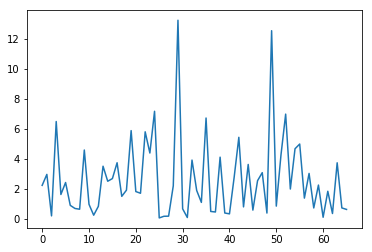

In [10]:
residus = np.zeros(n)

for i in range(n):
  X_del_i=np.delete(Xbiomarker5,i)
  Y_del_i=np.delete(Y,i) 
  
  lr.fit(X_del_i[:, np.newaxis], Y_del_i)
  
  residus[i] = abs(Y[i]-lr.predict(Xbiomarker5)[i])
plt.plot(residus)
indices = np.where(residus>9)[0] # 9 a été trouvé en observant le graphique
for ind in indices:
    print('Donnée aberrante n° '+ str(ind+1) + ': (' +str(Xbiomarker5[ind][0]) + '; ' + str(Y[ind][0]) + ')')

On retrouve les mêmes résultats par cette méthode.

##### QUESTION 3.4 : Comment traiteriez-vous les donnees aberrantes dans le contexte de la regression lineaire entre 'Disease progression' et 'Biomarker 5' pour estimer un lien pertinent entre ces deux variables

J'éliminerai ces deux données lors de l'apprentissage. On peut le vérifier rapidement en calculant le coefficient r2 dans les deux cas.

In [11]:
lr.fit(Xbiomarker5, Y)  

print('Le score r2 pour le modèle avec toutes les données est: ' + str(r2_score(Y, lr.predict(Xbiomarker5))))

X_del=np.delete(np.delete(Xbiomarker5,29),49)
Y_del=np.delete(np.delete(Y,29),49)

lr.fit(X_del[:, np.newaxis], Y_del)  

print('Le score r2 pour le modèle sans les données aberrantes est: ' + str(r2_score(Y_del, lr.predict(X_del[:, np.newaxis]))))

Le score r2 pour le modèle avec toutes les données est: 0.1682833588690068
Le score r2 pour le modèle sans les données aberrantes est: 0.3028303927251397


On observe un bien meilleur score avec le modèle sans les données aberrantes.

##### QUESTION 4 :   Une fois les observations aberrantes de 'Biomarker 5' traitees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Disease progression' a l'aide de la regression multiple regularisee.

##### QUESTION 4.1 : Expliquez pourquoi vous effecturez cette procedure sur 'X_scaled' plutot que 'X' ?

Dans un souci de comparer les différents coefficients obtenus par la régression linéaire multiple il est nécessaire de centrer et réduire pour respecter l'homogénéité. Dans le cas contraire, aucune comparaison n'est possible.

##### QUESTION 4.2 : Expliquez pourquoi vous regulariserez les coefficients estimes avec une regularisation de type LASSO plutot que RIDGE ?

Contrairement à celle de Ridge, la régularisation Lasso a le bon goût de sélectionner les variables du modèle c'est à dire d'annuler certains coefficients betas pour les variables non significatives.

##### QUESTION 4.3 : Codez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation

In [12]:
from sklearn.linear_model import Lasso

epsilon = 0.000001

alpha_choices = [0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1.,10.]

n = len(alpha_choices)

r2_scores=np.zeros(n)

for i,alpha in enumerate(alpha_choices):
    
    lasso_regressor = Lasso(alpha=alpha, fit_intercept=True)
    
    r2=0
    squared_error=0
    nb_beta=0
    
    for Train, test in kf.split(X_scaled):
        lasso_regressor.fit(X_scaled[Train],Y[Train])
        y_pred_lasso = lasso_regressor.predict(X_scaled[test])
        r2+=r2_score(Y[test], y_pred_lasso)

    r2_scores[i]=r2

index_better_r2=list(r2_scores).index(max(r2_scores)) #qualité de la prédiction des modèles

print('L alpha retenue est ' + str(alpha_choices[index_better_r2]))

L alpha retenue est 0.2


In [14]:
lasso_regressor = Lasso(alpha=0.2, fit_intercept=True)
lasso_regressor.fit(X_scaled,Y)
nb_betas=sum(abs(lasso_regressor.coef_)>epsilon)

print('Pour alpha=0.2, le nombre de variables retenues est: ' + str(nb_betas))

Pour alpha=0.2, le nombre de variables retenues est: 7


Le niveau de régularisation est bon pour alpha égal à 0.4.

##### QUESTION 4.4 : Codez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Une procédure de validation croisee de type leave-one-out sera idealement utilisee. La selection des variables est-elle stable ?

In [15]:
from sklearn.model_selection import LeaveOneOut

Loo=LeaveOneOut()
var_select={}
for alpha in [0.4, 0.45, 0.47, 0.473, 0.474, 0.475, 0.48, 0.49, 0.5]:
    testregu=True
    sum_squared_scores=0.
    sum_r2_scores=0.
    var_select[alpha]=[]
    for train, test in Loo.split(X):
        lasso_regressor = Lasso(alpha=alpha, fit_intercept=True)
        lasso_regressor.fit(X_scaled[train], Y[train])
  
        y_pred_lasso = lasso_regressor.predict(X_scaled[test])
        sum_squared_scores+=(Y[test][0][0]- y_pred_lasso[0])**2

        if sum(abs(lasso_regressor.coef_)>epsilon) > 3: # on verifie qu'un maximum de trois variables est utilisé
            testregu=False # sinon on laisse tomber le alpha
        else:
            var_select[alpha].append(np.where(abs(lasso_regressor.coef_)>epsilon)) # on stocke les variables sélectionnées
    if testregu:
        print('Pour alpha= ' +str(alpha))
        print('L erreur cumulé des résidus au carré est: ' +str(sum_squared_scores))
        

Pour alpha= 0.474
L erreur cumulé des résidus au carré est: 293.7017106263929
Pour alpha= 0.475
L erreur cumulé des résidus au carré est: 293.8216982887043
Pour alpha= 0.48
L erreur cumulé des résidus au carré est: 294.42626660374367
Pour alpha= 0.49
L erreur cumulé des résidus au carré est: 295.65855393532723
Pour alpha= 0.5
L erreur cumulé des résidus au carré est: 296.9217083012152


Pour alpha égal à 0.474, aucun modéle ne sélectionne plus de trois variables. De plus, c'est le alpha pour lequel la qualité de prédiction est maximale.

In [16]:
print(var_select[0.4])

[(array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), (array([ 0, 11, 15], dtype=int64),), 

Pour alpha égal à 0.474, chaque modèle généré par le leave one out sélectionne extactement trois variables (0,11 et 15). La sélection des variables est donc stable.

##### QUESTION 5 :   On s'interesse enfin au fichier 'MedicalData2.csv' et non 'MedicalData1.csv' qui contient une colonne qualitative supplementaire 'Pathology type'.

##### QUESTION 5.1 : Quelles sont les differences entre les structures du fichier 'MedicalData2.csv' et du fichier 'MedicalData1.csv' en plus de cette colonne supplementaire?

Les données sont séparées par ';' pour le fichier 'MedicalData1.csv' et par ',' pour le fichier 'MedicalData2.csv'.

##### QUESTION 5.2 : Est-ce qu'une variable semble bien expliquer la classe de 'Pathology type'. Quelle demarche vous semble la plus pertinente pour identifer cette variable ?


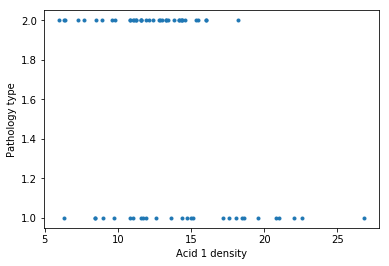

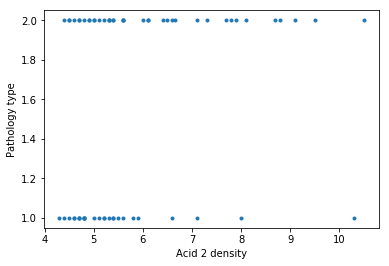

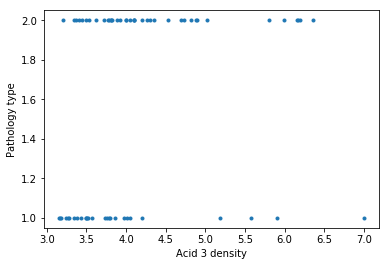

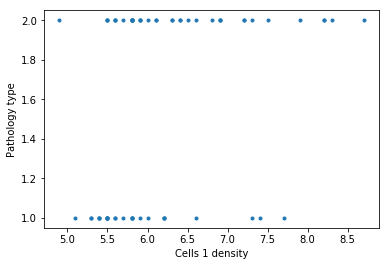

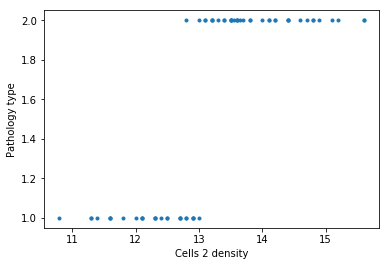

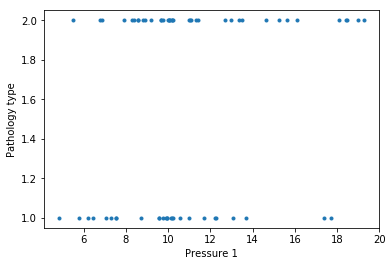

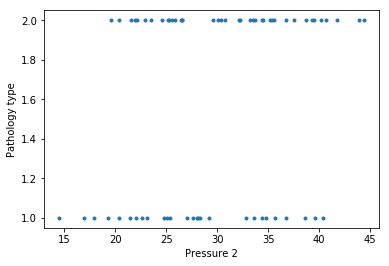

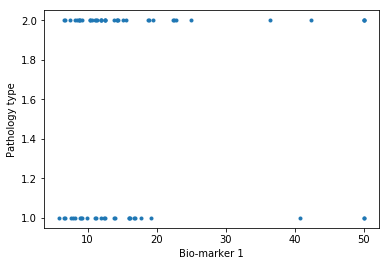

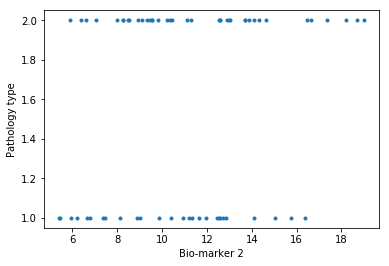

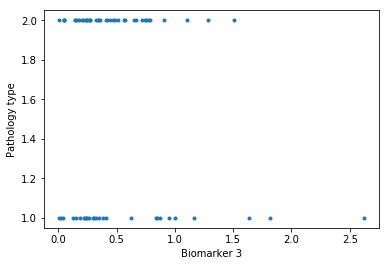

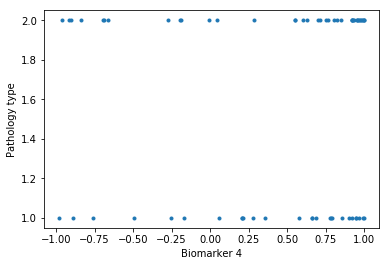

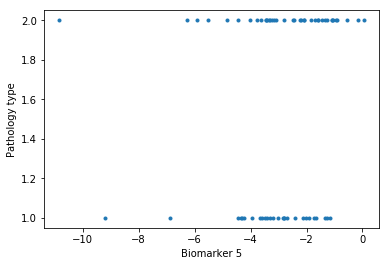

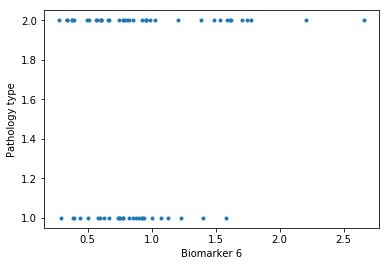

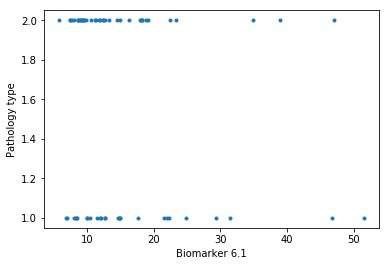

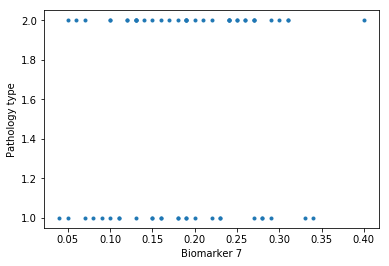

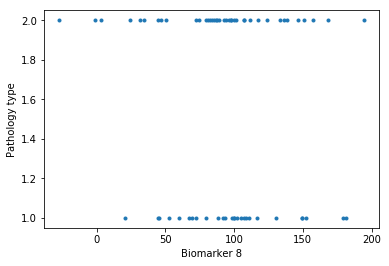

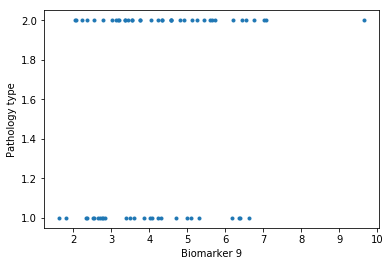

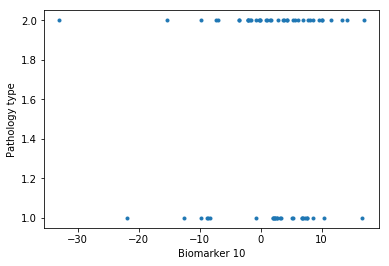

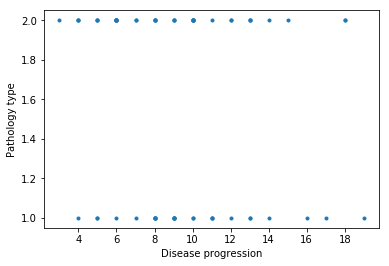

Beta values
-> Acid 1 density: 0.0
-> Acid 2 density: 0.6567675464985261
-> Acid 3 density: 0.0
-> Cells 1 density: 0.44630337841196255
-> Cells 2 density: 11.162542138855251
-> Pressure 1: 0.0
-> Pressure 2: -2.005250771090439
-> Bio-marker 1: 0.0
-> Bio-marker 2: 0.0
-> Biomarker 3: 0.0
-> Biomarker 4: -0.022466298643181688
-> Biomarker 5: 1.3515763753717522
-> Biomarker 6: 0.0
-> Biomarker 6.1: 0.0
-> Biomarker 7: 0.0
-> Biomarker 8: 0.0
-> Biomarker 9: 3.8559519696700226
-> Biomarker 10: -0.6820876505737676
-> Disease progression: -0.3415883328701589


In [17]:
dataframe=pandas.read_csv("./MedicalData2.csv",sep=',')

listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Pathology type')

Y=XY[:,ColNb_Y].reshape((XY.shape[0],))
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Pathology type')
  plt.show()

from sklearn.linear_model import LogisticRegression # on utilise une logistic regression

regressor=LogisticRegression(penalty='l1', C=10.0)

regressor.fit(X_scaled,Y)

print('Beta values')
for Col in range(len(listColNames)):
  print('-> '+listColNames[Col]+': '+str(regressor.coef_[0,Col]))

Comme on peut le voir sur le graphique, la variable 'Cells 2 density' semble bien expliquer la variable 'Pathology type'. Les résultats d'une régression logistique le confirme. La variable 'Cells 2 density' a le plus grand coefficient beta.